In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

## RF Chart

In [6]:
train = pd.read_csv('train_rf.csv')
test  = pd.read_csv('test_rf.csv')
oot = pd.read_csv('oot_rf.csv')

In [25]:
len(train)

625131

In [64]:
len(train[train['Fraud']==1])

9020

In [70]:
train = train.sort_values(by = 'pro', ascending = False)

In [75]:
num_train = []
for i in range(20):
    bins = sort[(i*6251):((i+1)*6251)]
    fraud = bins['Fraud'].sum()
    num_train.append(fraud)

In [76]:
num_train

[4302,
 295,
 190,
 103,
 90,
 69,
 50,
 39,
 38,
 43,
 34,
 46,
 54,
 50,
 45,
 34,
 42,
 40,
 34,
 30]

In [62]:
len(test)

208376

In [63]:
len(test[test['Fraud']==1])

2987

In [59]:
test = test.sort_values(by = 'pro', ascending = False)

In [82]:
num_test = []
for i in range(20):
    bins = test[i*2084:(i+1)*2081]
    fraud = bins['Fraud'].sum()
    num_test.append(fraud)

In [83]:
num_test

[1450,
 73,
 59,
 27,
 16,
 16,
 9,
 14,
 13,
 12,
 14,
 16,
 15,
 19,
 15,
 17,
 11,
 11,
 5,
 10]

In [84]:
len(oot)

166493

In [85]:
len(oot[oot['Fraud']==1])

2386

In [90]:
oot = oot.sort_values(by = 'pro', ascending = False)

In [95]:
num_oot = []
for i in range(20):
    bins = oot[i*1665:(i+1)*1665]
    fraud = bins['Fraud'].sum()
    num_oot.append(fraud)

In [99]:
num_oot

[1091, 57, 45, 31, 28, 21, 17, 10, 6, 5, 19, 16, 9, 12, 12, 10, 7, 20, 18, 12]

## Fraud Saving Chart

In [107]:
fraud_savings = []
loss_sales = []
overalls = []
for i in range(0,50,5):
    num = int(np.floor(len(oot)*i/100))
    frac = oot[0:num]
    num_record = len(frac)
    fraud = frac['Fraud'].sum()
    fpr = num_record - fraud
    fraud_saving = fraud * 6000
    loss_sale = fpr * 50
    overall = fraud_saving - loss_sale
    fraud_savings.append(fraud_saving)
    loss_sales.append(loss_sale)
    overalls.append(overall)

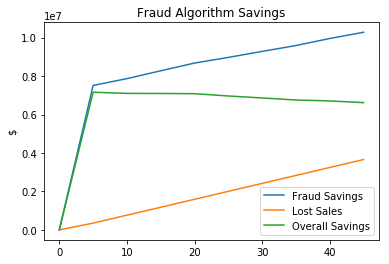

In [108]:
plt.title('Fraud Algorithm Savings')
plt.plot(range(0,50,5), fraud_savings, label = 'Fraud Savings')
plt.plot(range(0,50,5), loss_sales, label = 'Lost Sales')
plt.plot(range(0,50,5), overalls, label = 'Overall Savings')
plt.legend()
plt.xlabel('')
plt.ylabel('$')
plt.show()

In [109]:
num_oot = []
for i in range(51):
    bins = oot[i*1665:(i+1)*1665]
    fraud = bins['Fraud'].sum()
    num_oot.append(fraud)

In [111]:
pd.DataFrame(num_oot)

,0
0,1091
1,57
2,45
3,31
4,28
5,21
6,17
7,10
8,6
9,5


## Entity Chart

In [3]:
test = pd.read_csv('test_rf.csv')
train = pd.read_csv('train_rf.csv')
oot = pd.read_csv('oot_rf.csv')

In [17]:
df = pd.read_csv('applications_14_variables.csv')

In [11]:
ttl_pro = pd.concat([test,train,oot])

In [16]:
ttl_pro = ttl_pro[['Recnum','pro']]

In [18]:
df['date'].apply(str)
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [19]:
entity = df.merge(ttl_pro, how = 'left',left_on = 'record',right_on = 'Recnum')

In [20]:
entity.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dob_str', 'zip5_str', 'nameDOB',
       'fulladdress', 'Recnum', 'pro'],
      dtype='object')

In [22]:
entity = entity[['record', 'date','ssn','homephone','nameDOB','fulladdress','pro']]

In [23]:
entity.columns

Index(['record', 'date', 'ssn', 'homephone', 'nameDOB', 'fulladdress', 'pro'], dtype='object')

In [24]:
ssn_rank = pd.DataFrame(entity.groupby('ssn').agg({'ssn':'count','pro':'mean'}))

In [25]:
ssn_rank = ssn_rank.sort_values(by ='pro',ascending = False)

In [26]:
ssn_rank = ssn_rank[ssn_rank['ssn']>2]

In [27]:
ssn_rank

,ssn,pro
ssn,,
165764866,34,0.956889
295308935,30,0.950961
256440495,23,0.942470
826488428,25,0.941304
258312431,23,0.937314
205926169,21,0.936180
727200669,21,0.929665
406203526,23,0.929661
127072438,21,0.929334


In [72]:
ssnf = entity[entity['ssn']==786342597]
ssnf = ssnf.sort_values(by = 'date')
ssnf['num_of_record'] = list(range(1,int(len(ssnf)+1)))
ssnf['dayofmonth'] = ssnf['date'].dt.day

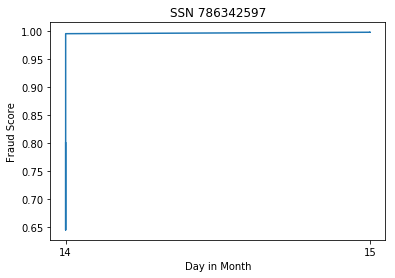

In [78]:
plt.title('SSN 786342597')
plt.plot(ssnf['dayofmonth'], ssnf['pro'],label = 'Fraud Score')
plt.xticks([14,15], [14,15])
plt.xlabel('Day in Month')
plt.ylabel('Fraud Score')
plt.show()

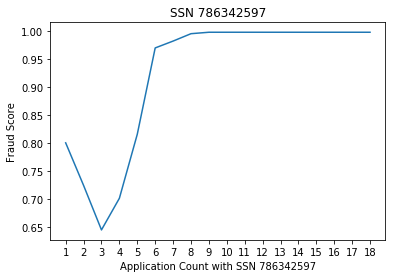

In [77]:
plt.title('SSN 786342597')
plt.plot(ssnf['num_of_record'], ssnf['pro'],label = 'Fraud Score')
plt.xticks(range(1,len(ssnf)+1), range(1,len(ssnf)+1))
plt.xlabel('Application Count with SSN 786342597')
plt.ylabel('Fraud Score')
plt.show()

In [79]:
ssnm = entity[entity['ssn']==786342597]
ssnm = ssnf.sort_values(by = 'date')
ssnm['num_of_record'] = list(range(1,int(len(ssnf)+1)))
ssnm['month'] = ssnf['date'].dt.month

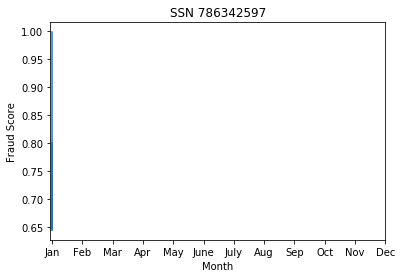

In [150]:
plt.title('SSN 786342597')
plt.plot(ssnm['month'], ssnm['pro'],label = 'Fraud Score')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Fraud Score')
plt.show()

In [122]:
nameDOB_rank = pd.DataFrame(entity.groupby('nameDOB').agg({'nameDOB':'count','pro':'mean'})).sort_values(by ='pro',ascending = False)

In [123]:
nameDOB_rank = nameDOB_rank[nameDOB_rank['nameDOB']>2]

In [125]:
nameDOB_rank

,nameDOB,pro
nameDOB,,
SAAEAXUAX_UUMSXJJX_19400301,34,0.956889
UAARSSXEX_RTUJZUMS_19221024,30,0.950961
XRSJUMZMA_EREAXMXJ_19010925,23,0.942470
EMAEMEMZ_EUSEZRAE_19170927,25,0.941304
SMRJTSZXU_MEXAJZU_19610618,23,0.937314
XAREUJZUM_EZMEUZST_19810318,21,0.936180
RJJJRMXRX_SXAZRXJM_19040121,21,0.929665
UTTTSEMAR_EMAZXXEX_19520423,23,0.929661
RERESSUSM_EXMJTETS_19871017,21,0.929334


In [134]:
ndob = entity[entity['nameDOB']=='XRSJUMZMA_EREAXMXJ_19010925']
ndob = ndob.sort_values(by = 'date')
ndob['num_of_record'] = list(range(1,int(len(ndob)+1)))
ndob['dayofmonth'] = ndob['date'].dt.day

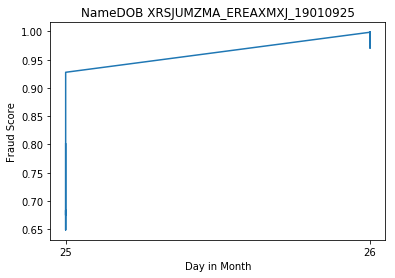

In [148]:
plt.title('NameDOB XRSJUMZMA_EREAXMXJ_19010925')
plt.plot(ndob['dayofmonth'], ndob['pro'],label = 'Fraud Score')
plt.xticks([25,26], [25,26])
plt.xlabel('Day in Month')
plt.ylabel('Fraud Score')
plt.show()

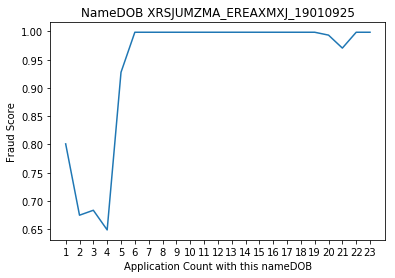

In [137]:
plt.title('NameDOB XRSJUMZMA_EREAXMXJ_19010925')
plt.plot(ndob['num_of_record'], ndob['pro'],label = 'Fraud Score')
plt.xticks(range(1,len(ndob)+1), range(1,len(ndob)+1))
plt.xlabel('Application Count with this nameDOB')
plt.ylabel('Fraud Score')
plt.show()

In [145]:
ndbom = entity[entity['nameDOB']=='XRSJUMZMA_EREAXMXJ_19010925']
ndbom = ndbom.sort_values(by = 'date')
ndbom['num_of_record'] = list(range(1,int(len(ndbom)+1)))
ndbom['month'] = ndbom['date'].dt.month

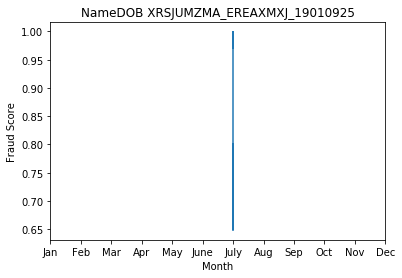

In [151]:
plt.title('NameDOB XRSJUMZMA_EREAXMXJ_19010925')
plt.plot(ndbom['month'], ndbom['pro'],label = 'Fraud Score')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Fraud Score')
plt.show()